# 1. Pengumpulan Data
Dataset didapatkan dari : https://archive.ics.uci.edu/dataset/45/heart+disease

Data yang digunakan yaitu file 'hungarian.data' dimana deskripsinya terdapat pada file 'heart-disease.names'

# 2. Menelaah Data

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle

## Load Data

In [2]:
file_path = 'heart+disease\hungarian.data'

with open(file_path, 'r') as file:
    raw_data = file.read()

raw_data = raw_data.strip().split('name')
raw_data.pop()
cleaned_data = [string.replace('\n\n', ' ').replace('\n', ' ').strip().split(' ') for string in raw_data]
data = pd.DataFrame(cleaned_data)
data = data.astype(float)

data.head()

0    1     2    3    4    5    6    7    8      9   ...   65   66   67  \
0  1254.0  0.0  40.0  1.0  1.0  0.0  0.0 -9.0  2.0  140.0  ... -9.0 -9.0 -9.0   
1  1255.0  0.0  49.0  0.0  1.0  0.0  0.0 -9.0  3.0  160.0  ... -9.0 -9.0 -9.0   
2  1256.0  0.0  37.0  1.0  1.0  0.0  0.0 -9.0  2.0  130.0  ... -9.0 -9.0 -9.0   
3  1257.0  0.0  48.0  0.0  1.0  1.0  1.0 -9.0  4.0  138.0  ... -9.0  2.0 -9.0   
4  1258.0  0.0  54.0  1.0  1.0  0.0  1.0 -9.0  3.0  150.0  ... -9.0  1.0 -9.0   

    68   69   70   71   72   73   74  
0  1.0  1.0  1.0  1.0  1.0 -9.0 -9.0  
1  1.0  1.0  1.0  1.0  1.0 -9.0 -9.0  
2  1.0  1.0  1.0  1.0  1.0 -9.0 -9.0  
3  1.0  1.0  1.0  1.0  1.0 -9.0 -9.0  
4  1.0  1.0  1.0  1.0  1.0 -9.0 -9.0  

[5 rows x 75 columns]

# 3. Validasi Data

Merubah data -9.0 menjadi nan, dikarenakan dalam dokumentasi nilai tersebut merupakan missing value.

In [3]:
data = data.where(data >= 0, np.nan)
data.head()

0    1     2    3    4    5    6   7    8      9   ...  65   66  67  \
0  1254.0  0.0  40.0  1.0  1.0  0.0  0.0 NaN  2.0  140.0  ... NaN  NaN NaN   
1  1255.0  0.0  49.0  0.0  1.0  0.0  0.0 NaN  3.0  160.0  ... NaN  NaN NaN   
2  1256.0  0.0  37.0  1.0  1.0  0.0  0.0 NaN  2.0  130.0  ... NaN  NaN NaN   
3  1257.0  0.0  48.0  0.0  1.0  1.0  1.0 NaN  4.0  138.0  ... NaN  2.0 NaN   
4  1258.0  0.0  54.0  1.0  1.0  0.0  1.0 NaN  3.0  150.0  ... NaN  1.0 NaN   

    68   69   70   71   72  73  74  
0  1.0  1.0  1.0  1.0  1.0 NaN NaN  
1  1.0  1.0  1.0  1.0  1.0 NaN NaN  
2  1.0  1.0  1.0  1.0  1.0 NaN NaN  
3  1.0  1.0  1.0  1.0  1.0 NaN NaN  
4  1.0  1.0  1.0  1.0  1.0 NaN NaN  

[5 rows x 75 columns]

# 4. Menentukan Fitur Data

sesuai dengan dokumentasi terdapat 14 fitur yang digunakan yaitu : 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'

In [4]:
column_feature = [2, 3, 8, 9, 11, 15, 18, 31, 37, 39, 40, 43, 50, 57]
data_filtered = data.iloc[:, column_feature]

column_mapping = {
    2: 'age',
    3: 'sex',
    8: 'cp',
    9: 'trestbps',
    11: 'chol',
    15: 'fbs',
    18: 'restecg',
    31: 'thalach',
    37: 'exang',
    39: 'oldpeak',
    40: 'slope',
    43: 'ca',
    50: 'thal',
    57: 'target',
}

data_filtered = data_filtered.rename(columns=column_mapping)
data_filtered.head()

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  40.0  1.0  2.0     140.0  289.0  0.0      0.0    172.0    0.0      0.0   
1  49.0  0.0  3.0     160.0  180.0  0.0      0.0    156.0    0.0      1.0   
2  37.0  1.0  2.0     130.0  283.0  0.0      1.0     98.0    0.0      0.0   
3  48.0  0.0  4.0     138.0  214.0  0.0      0.0    108.0    1.0      1.5   
4  54.0  1.0  3.0     150.0    NaN  0.0      0.0    122.0    0.0      0.0   

   slope  ca  thal  target  
0    NaN NaN   NaN     0.0  
1    2.0 NaN   NaN     1.0  
2    NaN NaN   NaN     0.0  
3    2.0 NaN   NaN     3.0  
4    NaN NaN   NaN     0.0

# 5. Membersihkan Data

mengisi null value / nan dalam data dengan rata rata, mengahapus data duplikasi

In [5]:
data_filtered.isnull().sum()

age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          290
thal        266
target        0
dtype: int64

In [6]:
data_filtered = data_filtered.drop('slope', axis=1).drop('ca', axis=1).drop('thal', axis=1)
data_filtered.isnull().sum()

age          0
sex          0
cp           0
trestbps     1
chol        23
fbs          8
restecg      1
thalach      1
exang        1
oldpeak      0
target       0
dtype: int64

In [7]:
meanTrestbps = round(data_filtered.trestbps.dropna().mean())
meanChol = round(data_filtered.chol.dropna().mean())
meanFbs = round(data_filtered.fbs.dropna().mean())
meanRestecg = round(data_filtered.restecg.dropna().mean())
meanThalach = round(data_filtered.thalach.dropna().mean())
meanExang = round(data_filtered.exang.dropna().mean())

In [8]:
mean_values = {
    'trestbps': meanTrestbps,
    'chol': meanChol,
    'fbs': meanFbs,
    'restecg': meanRestecg,
    'thalach': meanThalach,
    'exang': meanExang,
}

data_cleaned = data_filtered.fillna(value=mean_values)
data_cleaned.head()

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  40.0  1.0  2.0     140.0  289.0  0.0      0.0    172.0    0.0      0.0   
1  49.0  0.0  3.0     160.0  180.0  0.0      0.0    156.0    0.0      1.0   
2  37.0  1.0  2.0     130.0  283.0  0.0      1.0     98.0    0.0      0.0   
3  48.0  0.0  4.0     138.0  214.0  0.0      0.0    108.0    1.0      1.5   
4  54.0  1.0  3.0     150.0  251.0  0.0      0.0    122.0    0.0      0.0   

   target  
0     0.0  
1     1.0  
2     0.0  
3     3.0  
4     0.0

In [9]:
data_cleaned.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
target      0
dtype: int64

In [10]:
data_cleaned = data_cleaned.drop_duplicates()
data_cleaned.head()

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  40.0  1.0  2.0     140.0  289.0  0.0      0.0    172.0    0.0      0.0   
1  49.0  0.0  3.0     160.0  180.0  0.0      0.0    156.0    0.0      1.0   
2  37.0  1.0  2.0     130.0  283.0  0.0      1.0     98.0    0.0      0.0   
3  48.0  0.0  4.0     138.0  214.0  0.0      0.0    108.0    1.0      1.5   
4  54.0  1.0  3.0     150.0  251.0  0.0      0.0    122.0    0.0      0.0   

   target  
0     0.0  
1     1.0  
2     0.0  
3     3.0  
4     0.0

<Axes: >

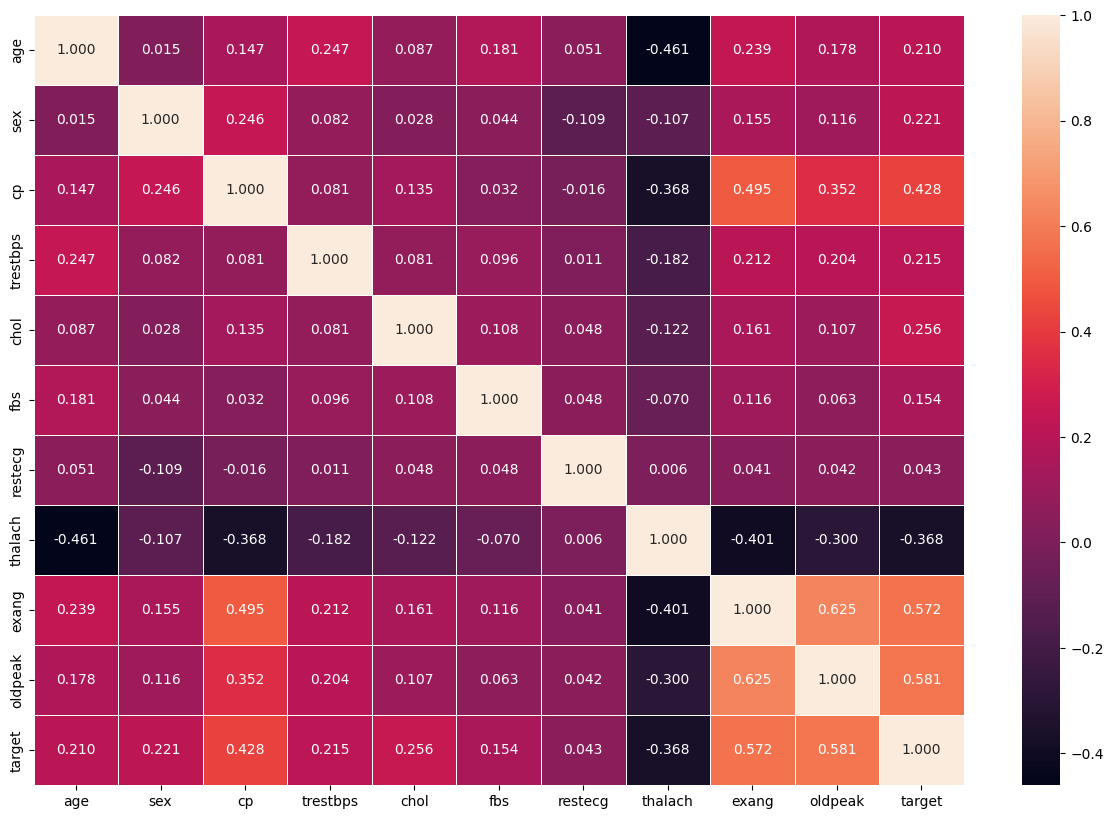

In [11]:
cor_mat=data_cleaned.corr()
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(cor_mat,annot=True,linewidths=0.5,fmt=".3f")

# 6.Konstruksi Data
penyesuaian fitur data, pemisahan label dengan fitur, penanganan data inbalance, normalisasi data

In [12]:
X = data_cleaned.drop("target",axis=1).values
y = data_cleaned.iloc[:,-1]

target
0.0    187
1.0     37
3.0     28
2.0     26
4.0     15
Name: count, dtype: int64


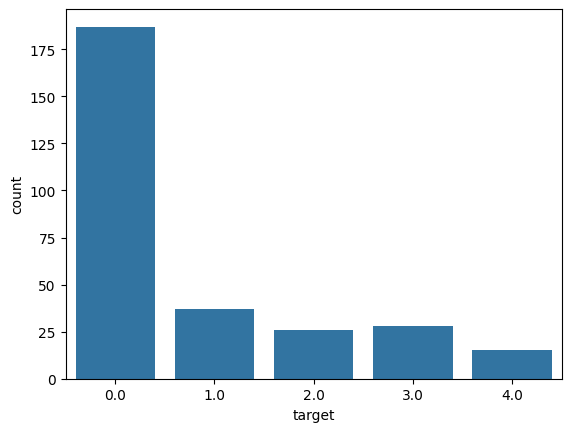

In [13]:
print(data_cleaned['target'].value_counts())

sns.countplot(x="target", data=data_cleaned)
plt.show()

In [14]:
# Oversampling
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)

# Undersampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X, y)

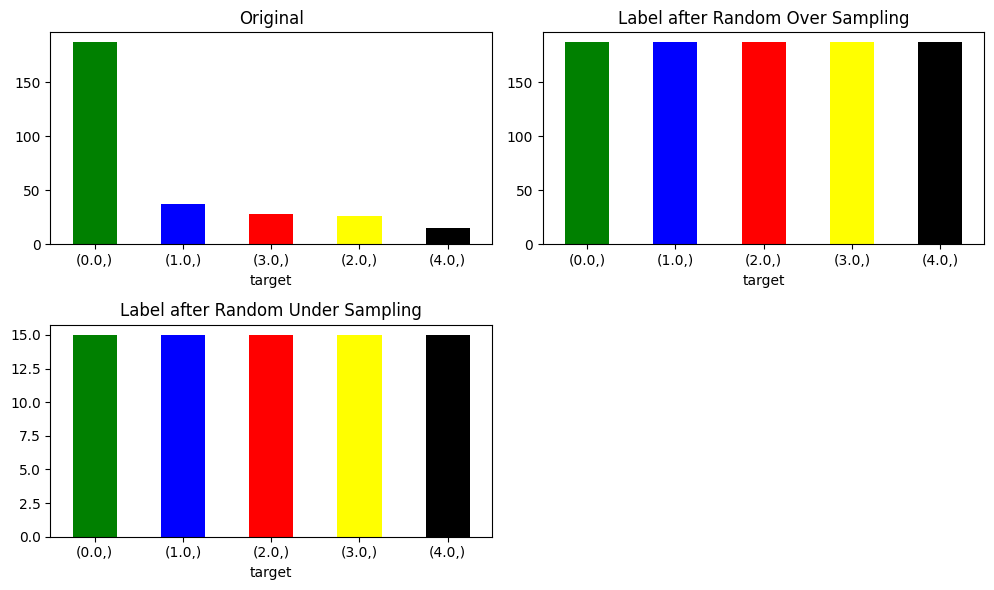

In [15]:
plt.figure(figsize=(12, 12))

# Subplot 1
plt.subplot(2, 2, 1)
label = pd.DataFrame(data=y)
label.value_counts().plot(kind='bar', figsize=(10, 6), color=['green', 'blue', 'red', 'yellow', 'black'])
plt.title("Original")
plt.xticks(rotation=0)

# Subplot 2
plt.subplot(2, 2, 2)
label_smote = pd.DataFrame(data=y_ros)
label_smote.value_counts().plot(kind='bar', figsize=(10, 6), color=['green', 'blue', 'red', 'yellow', 'black'])
plt.title("Label after Random Over Sampling")
plt.xticks(rotation=0)
plt.tight_layout()

# Subplot 3
plt.subplot(2, 2, 3)
label_tomekLinks = pd.DataFrame(data=y_rus)
label_tomekLinks.value_counts().plot(kind='bar', figsize=(10, 6), color=['green', 'blue', 'red', 'yellow', 'black'])
plt.title("Label after Random Under Sampling")
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

In [16]:
temp = pd.DataFrame(X)
temp.describe()

0           1           2           3           4           5  \
count  293.000000  293.000000  293.000000  293.000000  293.000000  293.000000   
mean    47.822526    0.726962    2.986348  132.662116  250.860068    0.068259   
std      7.824875    0.446282    0.965049   17.576793   65.059069    0.252622   
min     28.000000    0.000000    1.000000   92.000000   85.000000    0.000000   
25%     42.000000    0.000000    2.000000  120.000000  211.000000    0.000000   
50%     49.000000    1.000000    3.000000  130.000000  248.000000    0.000000   
75%     54.000000    1.000000    4.000000  140.000000  277.000000    0.000000   
max     66.000000    1.000000    4.000000  200.000000  603.000000    1.000000   

                6           7           8           9  
count  293.000000  293.000000  293.000000  293.000000  
mean     0.218430  139.058020    0.303754    0.588055  
std      0.460868   23.558003    0.460665    0.909554  
min      0.000000   82.000000    0.000000    0.000000  
25%      0.000000  122.000000    0.000000    0.000000  
50%      0.000000  140.000000    0.000000    0.000000  
75%      0.000000  155.000000    1.000000    1.000000  
max      2.000000  190.000000    1.000000    5.000000

In [17]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_ros = scaler.fit_transform(X_ros)
X_rus = scaler.fit_transform(X_rus)

In [18]:
temp = pd.DataFrame(X)
temp.describe()

0           1           2           3           4           5  \
count  293.000000  293.000000  293.000000  293.000000  293.000000  293.000000   
mean     0.521645    0.726962    0.662116    0.376501    0.320193    0.068259   
std      0.205918    0.446282    0.321683    0.162748    0.125597    0.252622   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.368421    0.000000    0.333333    0.259259    0.243243    0.000000   
50%      0.552632    1.000000    0.666667    0.351852    0.314672    0.000000   
75%      0.684211    1.000000    1.000000    0.444444    0.370656    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

                6           7           8           9  
count  293.000000  293.000000  293.000000  293.000000  
mean     0.109215    0.528315    0.303754    0.117611  
std      0.230434    0.218130    0.460665    0.181911  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.370370    0.000000    0.000000  
50%      0.000000    0.537037    0.000000    0.000000  
75%      0.000000    0.675926    1.000000    0.200000  
max      1.000000    1.000000    1.000000    1.000000

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42, stratify=y_test)


X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size=0.3, random_state=42,stratify=y_ros)
X_valid_ros, X_test_ros, y_valid_ros, y_test_ros = train_test_split(X_test_ros, y_test_ros, test_size=0.5, random_state=42, stratify=y_test_ros)

X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, test_size=0.3, random_state=42,stratify=y_rus)
X_valid_rus, X_test_rus, y_valid_rus, y_test_rus = train_test_split(X_test_rus, y_test_rus, test_size=0.5, random_state=42, stratify=y_test_rus)


# 7. Model


## KNN

In [20]:
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train, y_train)

knn_model_ros = KNeighborsClassifier(n_neighbors = 3)
knn_model_ros.fit(X_train_ros, y_train_ros)

knn_model_rus = KNeighborsClassifier(n_neighbors = 3)
knn_model_rus.fit(X_train_rus, y_train_rus)

KNeighborsClassifier(n_neighbors=3)

In [21]:
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = round(accuracy_score(y_test,y_pred_knn),3)
print("Accuracy KNN Original Dataset:", accuracy_knn)

y_pred_knn_ros = knn_model_ros.predict(X_test_ros)
accuracy_knn_ros = round(accuracy_score(y_test_ros,y_pred_knn_ros),3)
print("Accuracy KNN Random Over Sampling Dataset:", accuracy_knn_ros)

y_pred_knn_rus = knn_model_rus.predict(X_test_rus)
accuracy_knn_rus = round(accuracy_score(y_test_rus,y_pred_knn_rus),3)
print("Accuracy KNN Random Under Sampling Dataset:", accuracy_knn_rus)

Accuracy KNN Original Dataset: 0.636
Accuracy KNN Random Over Sampling Dataset: 0.943
Accuracy KNN Random Under Sampling Dataset: 0.25


In [22]:
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

print("Classification Report ROS:")
print(classification_report(y_test_ros, y_pred_knn_ros))

print("Classification Report RUS:")
print(classification_report(y_test_rus, y_pred_knn_rus))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.93      0.84        28
         1.0       0.29      0.33      0.31         6
         2.0       0.00      0.00      0.00         4
         3.0       0.00      0.00      0.00         4
         4.0       0.00      0.00      0.00         2

    accuracy                           0.64        44
   macro avg       0.21      0.25      0.23        44
weighted avg       0.53      0.64      0.58        44

Classification Report ROS:
              precision    recall  f1-score   support

         0.0       1.00      0.71      0.83        28
         1.0       0.90      1.00      0.95        28
         2.0       0.88      1.00      0.93        28
         3.0       1.00      1.00      1.00        29
         4.0       0.97      1.00      0.98        28

    accuracy                           0.94       141
   macro avg       0.95      0.94      0.94       141
weighted avg       0.95    

d:\Conda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Conda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Conda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Conda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1471: Und

## SVM

In [23]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

svm_model_ros = SVC()
svm_model_ros.fit(X_train_ros, y_train_ros)

svm_model_rus = SVC()
svm_model_rus.fit(X_train_rus, y_train_rus)

SVC()

In [24]:
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = round(accuracy_score(y_test,y_pred_svm),3)
print("Accuracy SVM Original Dataset:", accuracy_svm)

y_pred_svm_ros = svm_model_ros.predict(X_test_ros)
accuracy_svm_ros = round(accuracy_score(y_test_ros,y_pred_svm_ros),3)
print("Accuracy SVM Random Over Sampling Dataset:", accuracy_svm_ros)

y_pred_svm_rus = svm_model_rus.predict(X_test_rus)
accuracy_svm_rus = round(accuracy_score(y_test_rus,y_pred_svm_rus),3)
print("Accuracy SVM Random Under Sampling Dataset:", accuracy_svm_rus)

Accuracy SVM Original Dataset: 0.682
Accuracy SVM Random Over Sampling Dataset: 0.667
Accuracy SVM Random Under Sampling Dataset: 0.417


In [25]:
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

print("Classification Report ROS:")
print(classification_report(y_test_ros, y_pred_svm_ros))

print("Classification Report RUS:")
print(classification_report(y_test_rus, y_pred_svm_rus))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.96      0.87        28
         1.0       0.00      0.00      0.00         6
         2.0       0.29      0.50      0.36         4
         3.0       0.33      0.25      0.29         4
         4.0       0.00      0.00      0.00         2

    accuracy                           0.68        44
   macro avg       0.28      0.34      0.30        44
weighted avg       0.56      0.68      0.61        44

Classification Report ROS:
              precision    recall  f1-score   support

         0.0       0.87      0.71      0.78        28
         1.0       0.59      0.61      0.60        28
         2.0       0.55      0.86      0.67        28
         3.0       0.67      0.55      0.60        29
         4.0       0.81      0.61      0.69        28

    accuracy                           0.67       141
   macro avg       0.70      0.67      0.67       141
weighted avg       0.70    

d:\Conda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Conda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Conda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Conda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1471: Und

## Decision Tree

In [26]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

dt_model_ros = DecisionTreeClassifier()
dt_model_ros.fit(X_train_ros, y_train_ros)

dt_model_rus = DecisionTreeClassifier()
dt_model_rus.fit(X_train_rus, y_train_rus)

DecisionTreeClassifier()

In [27]:
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = round(accuracy_score(y_test,y_pred_dt),3)
print("Accuracy Decision Tree Original Dataset:", accuracy_dt)

y_pred_dt_ros = dt_model_ros.predict(X_test_ros)
accuracy_dt_ros = round(accuracy_score(y_test_ros,y_pred_dt_ros),3)
print("Accuracy Decision Tree Random Over Sampling Dataset:", accuracy_dt_ros)

y_pred_dt_rus = dt_model_rus.predict(X_test_rus)
accuracy_dt_rus = round(accuracy_score(y_test_rus,y_pred_dt_rus),3)
print("Accuracy Decision Tree Random Under Sampling Dataset:", accuracy_dt_rus)

Accuracy Decision Tree Original Dataset: 0.682
Accuracy Decision Tree Random Over Sampling Dataset: 0.929
Accuracy Decision Tree Random Under Sampling Dataset: 0.5


In [28]:
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

print("Classification Report ROS:")
print(classification_report(y_test_ros, y_pred_dt_ros))

print("Classification Report RUS:")
print(classification_report(y_test_rus, y_pred_dt_rus))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.93      0.87        28
         1.0       0.50      0.33      0.40         6
         2.0       0.25      0.25      0.25         4
         3.0       0.50      0.25      0.33         4
         4.0       0.00      0.00      0.00         2

    accuracy                           0.68        44
   macro avg       0.41      0.35      0.37        44
weighted avg       0.65      0.68      0.66        44

Classification Report ROS:
              precision    recall  f1-score   support

         0.0       1.00      0.64      0.78        28
         1.0       0.82      1.00      0.90        28
         2.0       0.90      1.00      0.95        28
         3.0       1.00      1.00      1.00        29
         4.0       0.97      1.00      0.98        28

    accuracy                           0.93       141
   macro avg       0.94      0.93      0.92       141
weighted avg       0.94    

## Random Forest

In [29]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

rf_model_ros = RandomForestClassifier()
rf_model_ros.fit(X_train_ros, y_train_ros)

rf_model_rus = RandomForestClassifier()
rf_model_rus.fit(X_train_rus, y_train_rus)

RandomForestClassifier()

In [30]:
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = round(accuracy_score(y_test,y_pred_rf),3)
print("Accuracy Decision Tree Original Dataset:", accuracy_rf)

y_pred_rf_ros = rf_model_ros.predict(X_test_ros)
accuracy_rf_ros = round(accuracy_score(y_test_ros,y_pred_rf_ros),3)
print("Accuracy Decision Tree Random Over Sampling Dataset:", accuracy_rf_ros)

y_pred_rf_rus = rf_model_rus.predict(X_test_rus)
accuracy_rf_rus = round(accuracy_score(y_test_rus,y_pred_rf_rus),3)
print("Accuracy Decision Tree Random Under Sampling Dataset:", accuracy_rf_rus)

Accuracy Decision Tree Original Dataset: 0.636
Accuracy Decision Tree Random Over Sampling Dataset: 0.972
Accuracy Decision Tree Random Under Sampling Dataset: 0.417


In [31]:
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Classification Report ROS:")
print(classification_report(y_test_ros, y_pred_rf_ros))

print("Classification Report RUS:")
print(classification_report(y_test_rus, y_pred_rf_rus))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.93      0.84        28
         1.0       0.67      0.33      0.44         6
         2.0       0.00      0.00      0.00         4
         3.0       0.00      0.00      0.00         4
         4.0       0.00      0.00      0.00         2

    accuracy                           0.64        44
   macro avg       0.29      0.25      0.26        44
weighted avg       0.58      0.64      0.59        44

Classification Report ROS:
              precision    recall  f1-score   support

         0.0       1.00      0.86      0.92        28
         1.0       0.93      1.00      0.97        28
         2.0       0.97      1.00      0.98        28
         3.0       1.00      1.00      1.00        29
         4.0       0.97      1.00      0.98        28

    accuracy                           0.97       141
   macro avg       0.97      0.97      0.97       141
weighted avg       0.97    

d:\Conda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Conda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Conda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## ANN

In [32]:
def create_model_ann() :
    model_ann = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(X.shape[1],)),
        tf.keras.layers.Dense(5, activation='softmax')
    ])

    model_ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model_ann


In [33]:
ann_model = create_model_ann()
ann_model_ros = create_model_ann()
ann_model_rus = create_model_ann()

In [34]:
ann_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_valid, y_valid), verbose=0)
ann_model_ros.fit(X_train_ros, y_train_ros, epochs=50, batch_size=16, validation_data=(X_valid_ros, y_valid_ros), verbose=0)
ann_model_rus.fit(X_train_rus, y_train_rus, epochs=50, batch_size=16, validation_data=(X_valid_rus, y_valid_rus), verbose=0)

In [35]:
y_pred_ann = np.argmax(ann_model.predict(X_test), axis=1)
accuracy_ann = round(accuracy_score(y_test,y_pred_ann),3)
print("Accuracy Artificial Neural Network Original Dataset:", accuracy_ann)

y_pred_ann_ros = np.argmax(ann_model_ros.predict(X_test_ros), axis=1)
accuracy_ann_ros = round(accuracy_score(y_test_ros,y_pred_ann_ros),3)
print("Accuracy Artificial Neural Network Random Over sampling Dataset:", accuracy_ann_ros)

y_pred_ann_rus = np.argmax(ann_model_rus.predict(X_test_rus), axis=1)
accuracy_ann_rus = round(accuracy_score(y_test_rus,y_pred_ann_rus),3)
print("Accuracy Artificial Neural Network Random Under Sampling Dataset:", accuracy_ann_rus)

2/2 [==============================] - 0s 5ms/step
Accuracy Artificial Neural Network Original Dataset: 0.682
5/5 [==============================] - 0s 2ms/step
Accuracy Artificial Neural Network Random Over sampling Dataset: 0.589
1/1 [==============================] - 0s 48ms/step
Accuracy Artificial Neural Network Random Under Sampling Dataset: 0.333


In [36]:
print("Classification Report:")
print(classification_report(y_test, y_pred_ann))

print("Classification Report ROS:")
print(classification_report(y_test_ros, y_pred_ann_ros))

print("Classification Report RUS:")
print(classification_report(y_test_rus, y_pred_ann_rus))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.96      0.87        28
         1.0       1.00      0.33      0.50         6
         2.0       0.14      0.25      0.18         4
         3.0       0.00      0.00      0.00         4
         4.0       0.00      0.00      0.00         2

    accuracy                           0.68        44
   macro avg       0.39      0.31      0.31        44
weighted avg       0.65      0.68      0.64        44

Classification Report ROS:
              precision    recall  f1-score   support

         0.0       0.69      0.71      0.70        28
         1.0       0.60      0.32      0.42        28
         2.0       0.49      0.64      0.55        28
         3.0       0.55      0.41      0.47        29
         4.0       0.63      0.86      0.73        28

    accuracy                           0.59       141
   macro avg       0.59      0.59      0.57       141
weighted avg       0.59    

d:\Conda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Conda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Conda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Conda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1471: Und

## DNN

In [37]:
def create_model_dnn() :
    model_dnn = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(5, activation='softmax')
    ])

    model_dnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model_dnn


In [38]:
dnn_model = create_model_dnn()
dnn_model_ros = create_model_dnn()
dnn_model_rus = create_model_dnn()

In [39]:
dnn_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_valid, y_valid), verbose=0)
dnn_model_ros.fit(X_train_ros, y_train_ros, epochs=50, batch_size=16, validation_data=(X_valid_ros, y_valid_ros), verbose=0)
dnn_model_rus.fit(X_train_rus, y_train_rus, epochs=50, batch_size=16, validation_data=(X_valid_rus, y_valid_rus), verbose=0)

In [40]:
y_pred_dnn = np.argmax(dnn_model.predict(X_test), axis=1)
accuracy_dnn = round(accuracy_score(y_test,y_pred_dnn),3)
print("Accuracy Deep Neural Network Original Dataset:", accuracy_dnn)

y_pred_dnn_ros = np.argmax(dnn_model_ros.predict(X_test_ros), axis=1)
accuracy_dnn_ros = round(accuracy_score(y_test_ros,y_pred_dnn_ros),3)
print("Accuracy Deep Neural Network Random Over Sampling Dataset:", accuracy_dnn_ros)

y_pred_dnn_rus = np.argmax(dnn_model_rus.predict(X_test_rus), axis=1)
accuracy_dnn_rus = round(accuracy_score(y_test_rus,y_pred_dnn_rus),3)
print("Accuracy Deep Neural Network Random Under Sampling Dataset:", accuracy_dnn_rus)

2/2 [==============================] - 0s 0s/step
Accuracy Deep Neural Network Original Dataset: 0.682
5/5 [==============================] - 0s 4ms/step
Accuracy Deep Neural Network Random Over Sampling Dataset: 0.901
1/1 [==============================] - 0s 79ms/step
Accuracy Deep Neural Network Random Under Sampling Dataset: 0.25


In [41]:
print("Classification Report:")
print(classification_report(y_test, y_pred_dnn))

print("Classification Report ROS:")
print(classification_report(y_test_ros, y_pred_dnn_ros))

print("Classification Report RUS:")
print(classification_report(y_test_rus, y_pred_dnn_rus))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.96      0.87        28
         1.0       1.00      0.17      0.29         6
         2.0       0.29      0.50      0.36         4
         3.0       0.00      0.00      0.00         4
         4.0       0.00      0.00      0.00         2

    accuracy                           0.68        44
   macro avg       0.42      0.33      0.30        44
weighted avg       0.67      0.68      0.63        44

Classification Report ROS:
              precision    recall  f1-score   support

         0.0       1.00      0.75      0.86        28
         1.0       0.92      0.82      0.87        28
         2.0       0.80      1.00      0.89        28
         3.0       0.90      0.93      0.92        29
         4.0       0.93      1.00      0.97        28

    accuracy                           0.90       141
   macro avg       0.91      0.90      0.90       141
weighted avg       0.91    

d:\Conda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Conda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Conda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Conda\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1471: Und

# 8. Evaluasi
evaluasi hasil setiap model

In [42]:
models = ['KNN', 'SVM', 'DT', 'RF', 'ANN', 'DNN']
accuracy_original = [accuracy_knn*100, accuracy_svm*100, accuracy_dt*100, accuracy_rf*100, accuracy_ann*100, accuracy_dnn*100]
accuracy_ros = [accuracy_knn_ros*100, accuracy_svm_ros*100, accuracy_dt_ros*100, accuracy_rf_ros*100, accuracy_ann_ros*100, accuracy_dnn_ros*100]
accuracy_rus = [accuracy_knn_rus*100, accuracy_svm_rus*100, accuracy_dt_rus*100, accuracy_rf_rus*100, accuracy_ann_rus*100, accuracy_dnn_rus*100]

data = {
    'Accuracy Original': accuracy_original,
    'Accuracy ROS': accuracy_ros,
    'Accuracy RUS': accuracy_rus
}

result_df = pd.DataFrame(data, index=models)
result_df

Accuracy Original  Accuracy ROS  Accuracy RUS
KNN               63.6          94.3          25.0
SVM               68.2          66.7          41.7
DT                68.2          92.9          50.0
RF                63.6          97.2          41.7
ANN               68.2          58.9          33.3
DNN               68.2          90.1          25.0

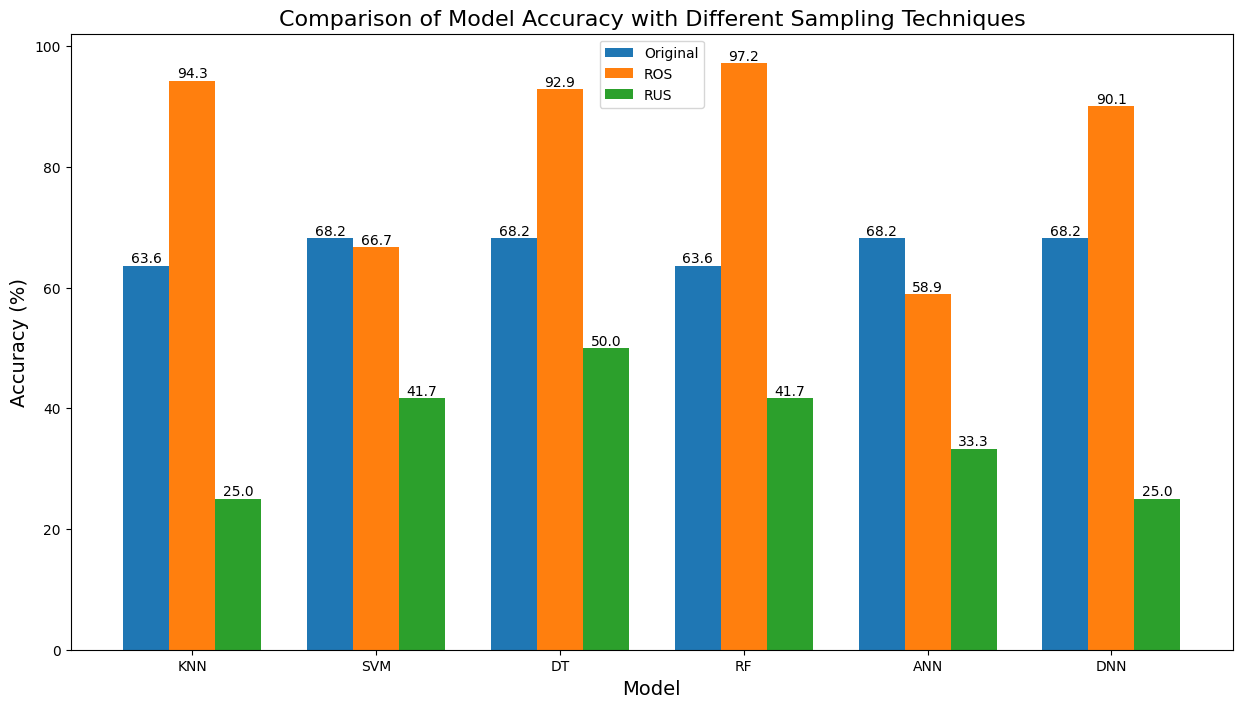

In [43]:
bar_width = 0.25
index = range(len(models))

fig, ax = plt.subplots(figsize=(15, 8))

bar1 = ax.bar(index, accuracy_original, bar_width, label='Original')
bar2 = ax.bar([i + bar_width for i in index], accuracy_ros, bar_width, label='ROS')
bar3 = ax.bar([i + 2 * bar_width for i in index], accuracy_rus, bar_width, label='RUS')

ax.set_xlabel('Model', fontsize=14)
ax.set_ylabel('Accuracy (%)', fontsize=14)
ax.set_title('Comparison of Model Accuracy with Different Sampling Techniques', fontsize=16)
ax.set_xticks([i + bar_width for i in index])
ax.set_xticklabels(models)
ax.legend()

def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)
add_labels(bar3)

plt.show()

# 9. Streamlit
menyimpan model terbaik, membuat tampilan web untuk presentasi model (streamlit_demo.py)

In [46]:
with open('best_model.pkl', 'wb') as file:
    pickle.dump(rf_model_ros, file)

with open('scaler_model.pkl', 'wb') as file:
    pickle.dump(scaler, file)

model_info = {'parameter': data_cleaned, 'accuracy': accuracy_rf_ros*100}
with open('model_info.pkl', 'wb') as file:
    pickle.dump(model_info, file)

# 10. Kesimpulan

Dari hasil eksperimen yang dilakukan pada dataset HeartDisease dengan tiga kondisi (original, random over sampling/ROS, dan random under sampling/RUS) menggunakan beberapa algoritma machine learning, dapat diambil beberapa kesimpulan:

1. **Original Data:**
   - **KNN:** Akurasi rendah (63.6%), mungkin karena ketidakseimbangan kelas.
   - **SVM:** Akurasi cukup baik (68.2%), namun tetap ada ruang untuk perbaikan.
   - **Decision Tree (DT):** Akurasi baik (68.2%), namun masih bisa ditingkatkan.
   - **Random Forest (RF):** Akurasi cukup baik (63.6%), tetapi mungkin ada ruang untuk peningkatan.
   - **Artificial Neural Network (ANN):** Akurasi tinggi (68.2%), namun perlu diwaspadai jika ada overfitting.
   - **Deep Neural Network (DNN):** Akurasi tinggi (68.2%), namun perlu diwaspadai overfitting.

2. **Random Over Sampling (ROS):**
   - Secara umum, terjadi peningkatan akurasi untuk semua model. Peningkatan ini mungkin disebabkan oleh penanganan ketidakseimbangan kelas dengan menambahkan sampel dari kelas minoritas.
   - KNN dan DT mencapai akurasi yang cukup tinggi setelah proses ROS.

3. **Random Under Sampling (RUS):**
   - Peningkatan akurasi terlihat pada beberapa model, tetapi tidak sebesar ROS.
   - Dalam beberapa kasus, seperti SVM dan DNN, akurasi setelah RUS bisa lebih rendah dibandingkan dengan kondisi original. Ini mungkin disebabkan oleh kehilangan informasi yang signifikan akibat pengurangan sampel dari kelas mayoritas.

4. **General Observations:**
   - Model Decision Tree (DT) dan Random Forest (RF) cenderung tampil baik pada kondisi original dan ROS.
   - SVM cenderung lebih baik pada kondisi asli, sementara beberapa model neural network (ANN dan DNN) mungkin lebih sensitif terhadap perubahan pada data setelah dilakukan penanganan ketidakseimbangan.